# Sentiment Analysis of Twitter Posts

<!-- Notebook name goes here -->
<center><b>Notebook: Data Description, Cleaning, Exploratory Data Analysis, and Preprocessing</b></center>
<br>

**by**: Stephen Borja, Justin Ching, Erin Chua, and Zhean Ganituen.

**dataset**: Hussein, S. (2021). Twitter Sentiments Dataset [Dataset]. Mendeley. https://doi.org/10.17632/Z9ZW7NT5H2.1

**motivation**: Every minute, social media users generate a large influx of textual data on live events. Performing sentiment analysis on this data provides a real-time view of public perception, enabling quick insights into the general population’s opinions and reactions.

**goal**: By the end of the project, our goal is to create and compare supervised learning algorithms for sentiment analysis.

### **dataset description**

The Twitter Sentiments Dataset is a dataset that contains nearly 163k tweets from Twitter. The time period of when these were collected is unknown, but it was published to Mendeley Data on May 14, 2021 by Sherif Hussein of Mansoura University.

Tweets were extracted using the Twitter API, but the specifics of how the tweets were selected are unmentioned. The tweets are mostly English with a mix of some Hindi words for code-switching <u>(El-Demerdash., 2021)</u>. All of them seem to be talking about the political state of India. Most tweets mention Narendra Modi, the current Prime Minister of India.

Each tweet was assigned a label using TextBlob's sentiment analysis <u>(El‑Demerdash, Hussein, & Zaki, 2021)</u>, which assigns labels automatically.

Twitter_Data

- **`clean_text`**: The tweet's text
- **`category`**: The tweet's sentiment category

What each row and column represents: `each row represents one tweet.` <br>
Number of observations: `162,980`

---

<a name="cite_note-1"></a>1. [^](#cite_ref-1) Code-switching is the practice of alternating between two languages $L_1$ (the native language) and $L_2$ (the source language) in a conversation. In this context, the code-switching is done to appear more casual since the conversation is done via Twitter (now, X).


## **1. Project Set-up**

We set the global imports for the projects (ensure these are installed via uv and is part of the environment). Furthermore, load the dataset here.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import sys
from wordcloud import WordCloud

# Use lib directory
sys.path.append(os.path.abspath("../lib"))

# Imports from lib files
from janitor import *
from lemmatize import lemmatizer
from boilerplate import stopwords_set
from bag_of_words import BagOfWordsModel

# Pandas congiruation
pd.set_option("display.max_colwidth", None)

# Load raw data file
df = pd.read_csv("../data/Twitter_Data.csv")

[nltk_data] Downloading package wordnet to /home/zrgnt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/zrgnt/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## **2. Data Cleaning**

This section discusses the methodology for data cleaning.


As to not waste computational time, a preliminary step is to ensure that no **`NaN`** or duplicate entries exist before the cleaning steps. We can call on `info()` after each step to see the rows changed in our DataFrame


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


There are clear inconsistencies with the amount of non-null values between column **`clean_text`** and **`category`** versus the total entries, so our first step would be to drop the `NaN` entries. We can first check which rows have **`category`** as **`NaN`**.


In [3]:
NaN_rows = df[df.isna().any(axis=1)]
NaN_rows

,clean_text,category
148,NaN,0.0
130448,the foundation stone northeast gas grid inaugurated modi came major,NaN
155642,dear terrorists you can run but you cant hide are giving more years modi which you won’ see you,NaN
155698,offense the best defence with mission shakti modi has again proved why the real chowkidar our,NaN
155770,have always heard politicians backing out their promises but modi has been fulfilling his each every,NaN
158693,modi government plans felicitate the faceless nameless warriors india totally deserved,NaN
158694,NaN,-1.0
159442,chidambaram gives praises modinomics,NaN
159443,NaN,0.0
160559,the reason why modi contested from seats 2014 and the real reason why rahul doing the same now,NaN


We found that there were a total of 11 rows that have **`NaN`** values, thus we drop them to ensure the integrity and accuracy of our data analysis.


In [4]:
df = df.dropna()
NaN_rows = df[df.isna().any(axis=1)]
NaN_rows

,clean_text,category


Another issue found commonly in real-world datasets would be duplicate rows, often from manual data entry errors, system glitches, or when merging data from multiple, overlapping sources. We can first check for duplicates in our `DataFrame` then remove them.

> 🍠 do i need to cite this


In [5]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,clean_text,category


There exist no duplicate rows within our `DataFrame`.


By converting a CSV file into a DataFrame, pandas automatically defaults numeric values to `float64` when it encounters decimals or **`NaN`** types. Text of `str` type get inferred and loaded into a `object` as the generic type for strings. We can check the dtype of our `DataFrame` columns through [`info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


We can see that **`clean_text`** column dtype is of `object` and category is of dytpe `float64`, to determine if the columns are assigned the right data type we check the unqiue values in each column.


In [7]:
for item in df["category"].unique():
    print(item)

-1.0
0.0
1.0


In [8]:
for item in df["clean_text"].unique()[:3]:
    print(item)

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
talk all the nonsense and continue all the drama will vote for modi 
what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax


Now that we have seen the unique values of each column, we can safely say that the data types assigned to both columns were not the right ones.


We first will convert column **`category`** from `float64` to `int64` considering that the range of values (**`-1`**, **`0`**, **`1`**) for a tweet's sentiment category will only ever be whole numbers. This step is done after dropping **`NaN`** value rows because **`NaN`** is fundamentally a float type.


In [9]:
df["category"] = df["category"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  object
 1   category    162969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


After successfully converting the **`category`** column into `int64`, next we convert column `clean_string` from `object` type into the pandas defined `string` type for consistency and better performance.


In [10]:
df["clean_text"] = df["clean_text"].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  string
 1   category    162969 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 3.7 MB


We are now finished with the _initial_ data cleaning steps, this level is more focused on the standard or common issues present in public datasets and the cleaning of it before we move onto our main cleaning pipeline, which would be more focused on cleaning the tweets themselves.


## **Main Cleaning Pipeline**

We follow a similar methodology for data cleaning presented in (George & Murugesan, 2024).


### **Normalization**

Due to the nature of the text being tweets, the presence of emojis and accented characters are to be expected. To see if our data has these special characters, we selected a sample set of them to be displayed if they were in **`clean_text`**.


In [11]:
# Finding a sample of rows with emojis
rows_with_emojis = df[df["clean_text"].str.contains(r"[\u263a-\U0001f645]", regex=True)]
rows_with_emojis["clean_text"].sample(5)

15663     feel ashamed associate myself with them diehard fan modi added chowkidar name support him removed later bcz some stupid right wingers but still support modiji ❤️✌️
56280                                                                                               mission shakti successful announces modi know all about ⚡low earth orbit 
20122                                                                                              dhokla asaduddin owaisi doubles down beef attack modi ⚡sushen mohan gupta 
118710                                                                                                                                                           fav writer ❤
9747                 ▶️ modi bjp central election committee meeting currently underway its headquarters delhi where expected finalize more names candidates fielded  ani \n➡️
Name: clean_text, dtype: string

In [12]:
# Finding a sample of rows with accented characters
accented_char_rows = df[df["clean_text"].str.contains(r"É|é|Á|á|ó|Ó|ú|Ú|í|Í")]
accented_char_rows["clean_text"].sample(5)

140427                                                                                                                                                                                     edo nairé too consumed hate for modi
134364                                                   india all these small political parties wolfs many years they enjoyed the kill together modi the lion made their life miserable exposé them they will run run run away
156327    advani must ruing the day nourished his protégés bjp such modi arun jaitley venkaiah naidu sushma swaraj who serially betrayed him the longheld view that the kind politics you practise eventually catches with you 
23047                                                                                                                     unlikely titfortat istan darpok nikammé babus chorriforri crook donnie bullyfears strength look jago 
24641     sagara sangamam moment for komali haasan  just how many blows can the ulaga nalayagan take fir

Although in a real-world context these do serve as a form of emotional expression, they provide no relevance towards _textual_ sentiment analysis, thus we normalize the text.


To normalize the text, the `normalize` function was created. It normalizes the text input to ASCII-only characters (say, "cómo estás" becomes "como estas") and lowercased alphabetic symbols. The dataset contains Unicode characters (e.g., emojis and accented characters) which the function replaces to the empty string (`''`).


In [13]:
normalize??

Signature: normalize(text: str) -> str
Source:   
def normalize(text: str) -> str:
    """
    Normalize text from a pandas entry to ASCII-only lowercase characters. Hence, this removes Unicode characters with no ASCII
    equivalent (e.g., emojis and CJKs).

    Do not use this function alone, use `clean_and_tokenize()`.

    # Parameters
    * text: String entry.

    # Returns
    ASCII-normalized text containing only lowercase letters.

    # Examples
    normalize("¿Cómo estás?")
    $ 'como estas?'

    normalize(" hahahaha HUY! Kamusta 😅 Mayaman $$$ ka na ba?")
    $ ' hahahaha huy! kamusta  mayaman $$$ ka na ba?'
    """
    normalized = unicodedata.normalize("NFKD", text)
    ascii_text = normalized.encode("ascii", "ignore").decode("ascii")

    return ascii_text.lower()
File:      ~/STINTSY-Order-of-Erin/lib/janitor.py
Type:      function

### **Punctuations**

Punctuations are part of natural speech and reading to provide a sense of structure, clarity, and tone to sentences, but in the context of a classification study, punctuations do not add much information to the sentiment of a message. The sentiment of `i hate you!` and `i hate you` are going to be the same despite the punctuation mark `!` being used to accentuate the sentiment. We can see a sample of rows with punctations below.


In [14]:
# Finding a sample of rows with punctuation
rows_with_punc = df[df["clean_text"].str.contains(r"[^\w\s]")]
rows_with_punc["clean_text"].sample(5)

7814      very true ’ april 2014 before the arrival modi now indians expecting lest one spot jump ————\nindia displaces japan become thirdlargest world economy terms ppp world bank via 
117500                                                                                           modi protects rich congress bats for the poor weaker sections rahul gandhi ⚡arshi khan⚡ 
162723                                                     don’ worry not alone and the great achievement last five year has 125 crore citizens can stop this great nation rise and shine
102878                                                                                                                               watch your favourite country what says about modi✌️ 
30905                                                                                                                   watch spg covered narendra modi’ fullproof unbreachable security 
Name: clean_text, dtype: string

To address this, the function `rem_punctuation` was made, which replaces all punctuations and special characters with an empty string (`''`)


In [15]:
rem_punctuation??

Signature: rem_punctuation(text: str) -> str
Source:   
def rem_punctuation(text: str) -> str:
    """
    Removes the punctuations. This function simply replaces all punctuation marks and special characters
    to the empty string. Hence, for symbols enclosed by whitespace, the whitespace are not collapsed to a single whitespace
    (for more information, see the examples).

    Do not use this function alone, use `clean_and_tokenize()`.

    # Parameters
    * text: String entry.

    # Returns
    Text with the punctuation removed.

    # Examples
    rem_punctuation("this word $$ has two spaces after it!")
    $ 'this word  has two spaces after it'

    rem_punctuation("these!words@have$no%space")
    $ 'thesewordshavenospace'
    """
    return re.sub(f"[{re.escape(string.punctuation)}]", "", text)
File:      ~/STINTSY-Order-of-Erin/lib/janitor.py
Type:      function

### **Numbers**

Similar to punctuations, numbers do not add any information to the sentiment of a message.


In [16]:
# Finding a sample of rows that contain numbers
rows_with_numbers = df[df["clean_text"].str.contains(r"\d")]
rows_with_numbers["clean_text"].sample(5)

112663    815million out the 1250 million population were eligible for voting 2014 which only voted roughly around 530 million people voted 2014 less than the population which modi secured votespease check your maths dumb and 
153700                                                                                                                                                                    modi will crash all mig21 and just make deal for rafales
40559                                                                                                                                                 prime minister narendra modi address the nation between 1145 1200 noon today
27479                                                                                                                                                british bob blackman asking people vote for modi the upcoming election 2019  
16873                                                                                       

Hence, we defined the `rem_numbers` as a function that replaces all numerical values as an empty string (`''`).


In [17]:
rem_numbers??

Signature: rem_numbers(text: str) -> str
Source:   
def rem_numbers(text: str) -> str:
    """
    Removes numbers. This function simply replaces all numerical symbols to the empty string. Hence, for symbols enclosed by
    whitespace, the whitespace are not collapsed to a single whitespace (for more information, see the examples).

    Do not use this function alone, use `clean_and_tokenize()`.

    # Parameters
    * text: String entry.

    # Returns
    Text with the numerical symbol removed

    # Examples
    rem_numbers(" h3llo, k4must4 k4  n4?")
    ' hllo, kmust k  n?'
    """
    return re.sub(r"\d+", "", text)
File:      ~/STINTSY-Order-of-Erin/lib/janitor.py
Type:      function

### **Whitespace**

Similar to punctations, whitespaces do not add any information to the text and are from user errors. We check if our data has whitespace.


In [18]:
# Finding a sample of rows that contain 2 or more whitespaces in a row
rows_with_whitespaces = df[df["clean_text"].str.contains(r"\s{2,}")]
rows_with_whitespaces["clean_text"].sample(5)

49414         cant this aunty its biggest news for india terms security space war baare mai kuch janti  sirf anti modi anti bjp pata hai 
58500                                                                                         but modi was not 2012that’ the difference  
147695                         where summs modi sarkars five year performance following words  ❝privatization profit socialisation loss❞ 
56693     pray god once again became our prime minister proud from the depth heart indian and the name our prime minister narendra modi  
33320                                                       pig shit  modi has agenda ehmy ass first ask that moron the spelling agenda  
Name: clean_text, dtype: string

Thus to address the problem, the function `collapse_whitespace` was made, which collapses all whitespace characters to a single space. Formally, it is a transducer

$$
\Box^+ \mapsto \Box \qquad \text{where the space character is } \Box
$$

Informally, it replaces all strings of whitespaces to a single whitespace character.


In [19]:
collapse_whitespace??

Signature: collapse_whitespace(text: str) -> str
Source:   
def collapse_whitespace(text: str) -> str:
    """
    This collapses whitespace. Here, collapsing means the transduction of all whitespace strings of any
    length to a whitespace string of unit length (e.g., "   " -> " "; formally " "+ -> " ").

    Do not use this function alone, use `clean_and_tokenize()`.

    # Parameters
    * text: String entry.

    # Returns
    Text with the whitespaces collapsed.

    # Examples
    collapse_whitespace("  huh,  was.  that!!! ")
    $ 'huh, was. that!!!'
    """
    return re.sub(" +", " ", text).strip()
File:      ~/STINTSY-Order-of-Erin/lib/janitor.py
Type:      function

To seamlessly call all these cleaning functions, we have the `clean` function that acts as a container that calls these separate components. The definition of this wrapper function is quite long, see [this appendix](#appendix:-clean-wrapper-function-definition) for its definition.

We can now clean the dataset and store it in a new column named `clean_ours` (to differentiate it with the, still dirty, column `clean_text` from the dataset author)


In [20]:
df["clean_ours"] = df["clean_text"].map(clean).astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  string
 1   category    162969 non-null  int64 
 2   clean_ours  162969 non-null  string
dtypes: int64(1), string(2)
memory usage: 5.0 MB


To confirm if the character cleaning worked, we can check for the differences between `clean_text` and `clean_ours` from the filtered rows below and compare the differences.


In [21]:
example_rows = df[
    df["clean_text"].str.contains(r"\s{2,}|\d|[^\w\s]|[\u263a-\U0001f645]|[ÉéÁáóÓúÚíÍ]")
]
example_rows.sample(10)

,clean_text,category,clean_ours
153861,poverty decreased the modi governance countrys chowkidar watchman alert union mos health the launch tv9s hindi news channel,-1,poverty decreased the modi governance countrys chowkidar watchman alert union mos health the launch tvs hindi news channel
156874,“trust the watchman keep your money safe” modi delhi event – ndtv,1,trust the watchman keep your money safe modi delhi event ndtv
114824,actually you want modi prime minister for another 5years that you will remain powerful minister for another 5years without contesting election,1,actually you want modi prime minister for another years that you will remain powerful minister for another years without contesting election
49553,case you missed modis speech here jai hind jai barath vandaymaatarm proud being indian \n,1,case you missed modis speech here jai hind jai barath vandaymaatarm proud being indian
84756,not even men are looking their modi the one who will get @ wait and watch,0,not even men are looking their modi the one who will get wait and watch
132926,budget2019 evidently demonstrates modi’ desire for the development north eastern areas with hike the allocation the budget,1,budget evidently demonstrates modi desire for the development north eastern areas with hike the allocation the budget
104755,criticism absolutely fine but how can you loose your mental balance just for the sake criticism again homework from modi haters,1,criticism absolutely fine but how can you loose your mental balance just for the sake criticism again homework from modi haters
87512,the big news orders panel examine modi’ mission shakti speech and other top stories –,1,the big news orders panel examine modi mission shakti speech and other top stories
33889,tweeting from bathroom won’ get modi’ degree file one rti show the prove that can’ get information don’ ideal guru ‘ verbal diarrhoea rumours,1,tweeting from bathroom won get modi degree file one rti show the prove that can get information don ideal guru verbal diarrhoea rumours
9356,yeah modi got back all the black money stashed abroad and deposited lac every account promised him also india the safest country especially for women and minorities ाेशबचा,-1,yeah modi got back all the black money stashed abroad and deposited lac every account promised him also india the safest country especially for women and minorities


We are now finished with basic text cleaning, but the data cleaning does not end here. Given that the text is sourced from Twitter, it includes characteristics, such as spam and informal expressions, which are not addressed by basic cleaning methods. As a result, we move on to further cleaning tailored to the nature of Twitter data.


### **Spam, Expressions, Onomatopoeia, etc.**

Since the domain of the corpus is Twitter, spam (e.g., `bbbb`), expressions (e.g., `bruhhhh`), and onomatopoeia (e.g., `hahahaha`) may become an issue by the vector representation step. Hence we employed a simple rule-based spam removal algorithm.

We remove words in the string that contains the same letter or substring thrice and consecutively. These were done using regular expressions:

$$
\text{same\_char\_thrice} := (.)\textbackslash1^{\{2,\}}
$$

and

$$
\text{same\_substring\_twice} := (.^+)\textbackslash1^+
$$

Furthermore, we also remove any string that has a length less than three, since these are either stopwords (that weren't detected in the stopword removal stage) or more spam.

Finally, we employ adaptive character diversity threshold for the string $s$.

$$
\frac{\texttt{\#\_unique\_chars}(s)}{|s|} < 0.3 + \left(\frac{0.1 \cdot \text{min}(|s|, 10)}{10}\right)
$$

It calculates the diversity of characters in a string; if the string repeats the same character alot, we expect it to be unintelligible or useless, hence we remove the string.

The definition of this wrapper function is quite long, see its definition in [this appendix](#appendix:-find_spam_and_empty-wrapper-function-definition).

Let's first look at a random sample of 10 entries from the dataset that will be modified by the function.


In [22]:
affected = df[df["clean_ours"].apply(spam_affected)]
affected_sample = affected["clean_ours"].sample(10)
affected_sample

48380           congrats drdoisro for the achievement congrats specially gr pmmodi who gave free hand strengthening the institutionsmodi need not bother about someunder the garb liberalsoldout presstitutes which wud criticise him out frustration
135245                                       ohhh has changed the accounting standard and here modi has changed the entire formula gdp calculation and are quiet modi govt not even releasing actual data woowwwww guyz are hardcore master hypocrisy
12262                                                                                                                                                                   modi gave news anchors some journalists congress giving the same oor families
123237                                                 jagate rahooo for our new generations make akhand bharat like the vision gurudev chanakaya modi every single vote modi bjp dream team bharat prayers seats modi sardar sarkaar har har mahadev
4580            

Let's now call this function on the `clean_ours` column of the dataset.


In [23]:
df["clean_ours"] = df["clean_ours"].map(find_spam_and_empty).astype("string")

To confirm if the function was able to do remove all the spammy substrings, we can check `before` and `after` to compare their differences.


In [24]:
comparison = pd.DataFrame({"before": affected_sample, "after": df["clean_ours"]})

changed = comparison[comparison["before"] != comparison["after"]]
changed.sample(10)

,before,after
4580,for the first time the history india governor campaigning for bjp and bhakt going gaga,for the first time the history india governor campaigning for bjp and bhakt going
31491,ureapotassium bag rates surged from rs modi regime still any farmers votes bjp insane nda winning kongu belt more tougher than delta region,ureapotassium bag rates surged from modi regime still any farmers votes bjp insane nda winning kongu belt more tougher than delta region
110412,there was such disparity the sets sst paper th this almost discriminatory,there was such disparity the sets paper this almost discriminatory
48380,congrats drdoisro for the achievement congrats specially gr pmmodi who gave free hand strengthening the institutionsmodi need not bother about someunder the garb liberalsoldout presstitutes which wud criticise him out frustration,congrats drdoisro for the achievement congrats specially pmmodi who gave free hand strengthening the institutionsmodi need not bother about someunder the garb liberalsoldout presstitutes which wud criticise him out frustration
123237,jagate rahooo for our new generations make akhand bharat like the vision gurudev chanakaya modi every single vote modi bjp dream team bharat prayers seats modi sardar sarkaar har har mahadev,jagate for our new generations make akhand bharat like the vision gurudev chanakaya modi every single vote modi bjp dream team bharat prayers seats modi sardar sarkaar har har mahadev
135245,ohhh has changed the accounting standard and here modi has changed the entire formula gdp calculation and are quiet modi govt not even releasing actual data woowwwww guyz are hardcore master hypocrisy,has changed the accounting standard and here modi has changed the entire formula gdp calculation and are quiet modi govt not even releasing actual data guyz are hardcore master hypocrisy
162367,know thumbs upu slowbut every head the state welcome other head the statetrumph bhi aata hai modi lene liyeamerica pak blacklist kar diya haihum toh th largest economy hai world bhi paise utar sakte haibut business livrage kuch hotahai,know thumbs upu slowbut every head the state welcome other head the statetrumph bhi hai modi lene liyeamerica pak blacklist kar diya haihum toh largest economy hai world bhi paise utar sakte haibut business livrage kuch hotahai
159571,bbc news ukraine election comedian frontrunner first round better for the world elect comedia than\ntrump\nbolsenaro\norban\nsalvini pen\nafd\nwilders\nkaczynski\nmodi\nduterte\nsuu kyi\nputin\netc etc,news ukraine election comedian frontrunner first round better for the world elect comedia than trump bolsenaro orban salvini pen afd wilders kaczynski modi duterte suu kyi putin etc etc
161362,tomorrow morningapril baroda aavis,tomorrow morningapril baroda
12262,modi gave news anchors some journalists congress giving the same oor families,modi gave news anchors some journalists congress giving the same families


Let’s examine whether applying this function has caused any significant changes to the DataFrame structure, given that it can convert entire cells to `NaN`.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  string
 1   category    162969 non-null  int64 
 2   clean_ours  162942 non-null  string
dtypes: int64(1), string(2)
memory usage: 5.0 MB


The DataFrame structure is intact, but **`clean_ours`** now has 27 fewer non-null values, reflecting cells that were entirely filtered out as spam as seen below.


In [26]:
spam_rows = df[df["clean_ours"].isna()]
spam_rows[["clean_text", "clean_ours"]]

,clean_text,clean_ours
21806,bjpmpsubramanianswamyiamchowkidarcampaignpmmodi,<NA>
21855,terrorfundinghurriyatleaderspropertyseizedhafizsaeedmodigovt,<NA>
24148,pmnarendramodirequestsofexservicemanindianarmyhavildarombirsinghsharma9258,<NA>
35636,2019,<NA>
35866,‍,<NA>
35968,whattttttt,<NA>
37837,allllll,<NA>
40587,1145am,<NA>
40977,⌚1145 ❤,<NA>
48127,birthdaaaaaay,<NA>


## **Post-Cleaning Steps**

At some point during the cleaning stage, some entries of the dataset could have been reduced to `NaN` or the empty string `""`, or we could have introduced duplicates again. So, let's call `dropna` and `drop_duplicates` again to finalize the cleaning stage.


In [27]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162942 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162942 non-null  string
 1   category    162942 non-null  int64 
 2   clean_ours  162942 non-null  string
dtypes: int64(1), string(2)
memory usage: 5.0 MB


In [28]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162942 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162942 non-null  string
 1   category    162942 non-null  int64 
 2   clean_ours  162942 non-null  string
dtypes: int64(1), string(2)
memory usage: 5.0 MB


# **3. Preprocessing**

> WIP Narrative and Sequence
> 🏗️ Perhaps swap S3 and S4. Refer to literature on what comes first.

This section discusses preprocessing steps for the cleaned data. Because the goal is to analyze the textual sentiments of tweets the following preprocessing steps are needed to provide the Bag of Words model with the relevant information required to get the semantic embeddings of each tweet.

Before and after each preprocessing step, we will show 5 random entries in the dataset to show the effects of each preprocessing task.

## **Lemmatization**

We follow a similar methodology for data cleaning presented in <u>(George & Murugesan, 2024)</u>. We preprocess the dataset entries via lemmatization. We use NLTK for this task using WordNetLemmatizer lemmatization, repectively <u>(Bird & Loper, 2004)</u>. For the lemmatization step, we use the WordNet for English lemmatization and Open Multilingual WordNet version 1.4 for translations and multilingual support which is important for our case since some tweets contain text from Indian Languages.


In [29]:
df["lemmatized"] = df["clean_ours"].map(lemmatizer)
df.sample(10)

,clean_text,category,clean_ours,lemmatized
58567,india shot down satellite modi says joining select group nations via nytimes,-1,india shot down satellite modi says joining select group nations via nytimes,india shot down satellite modi say joining select group nation via nytimes
55365,ussr stood for urdu speaker sharia republic which nehru formed protect and promote the minorities the world its shame got disintegrated and the blame modi should resign,0,ussr stood for urdu speaker sharia republic which nehru formed protect and promote the minorities the world its shame got disintegrated and the blame modi should resign,ussr stood for urdu speaker sharia republic which nehru formed protect and promote the minority the world it shame got disintegrated and the blame modi should resign
135423,dont blame modi sarkar for unemploymentwork hard and make use all opportunity modiji has given such mudra bank yojna etc,-1,dont blame modi sarkar for unemploymentwork hard and make use all opportunity modiji has given such mudra bank yojna etc,dont blame modi sarkar for unemploymentwork hard and make use all opportunity modiji ha given such mudra bank yojna etc
151437,you ever think modi dictator just through biography indira gandhi\n,0,you ever think modi dictator just through biography indira gandhi,you ever think modi dictator just through biography indira gandhi
13435,modi should cancel program and use the time think counter scheme,0,modi should cancel program and use the time think counter scheme,modi should cancel program and use the time think counter scheme
116964,already modi govt done for fisherman they have longer problemsmodi jai,0,already modi govt done for fisherman they have longer problemsmodi jai,already modi govt done for fisherman they have longer problemsmodi jai
53763,yes sir everything was ready but who was stopping your fav party test please dont say modi stopped you could have done the testing and claimed the credit grow kid,1,yes sir everything was ready but who was stopping your fav party test please dont say modi stopped you could have done the testing and claimed the credit grow kid,yes sir everything wa ready but who wa stopping your fav party test please dont say modi stopped you could have done the testing and claimed the credit grow kid
74814,these jokers not know everything can carried out model code conduct also with intimation permission the sure modi government would have informed taken consent too therefore disregard what these stooges utter matters least guha,1,these jokers not know everything can carried out model code conduct also with intimation permission the sure modi government would have informed taken consent too therefore disregard what these stooges utter matters least guha,these joker not know everything can carried out model code conduct also with intimation permission the sure modi government would have informed taken consent too therefore disregard what these stooge utter matter least guha
26218,will say proudly anti modi,1,will say proudly anti modi,will say proudly anti modi
8404,everything well but blind modi haters cant understand,-1,everything well but blind modi haters cant understand,everything well but blind modi hater cant understand


## **Stop Word Removal**

After lemmatization, we may now remove the stop words present in the dataset. The stopword removal _needs_ to be after lemmatization since this step requires all words to be reduces to their base dictionary form, and the `stopword_set` only considers base dictionary forms of the stopwords.

**stopwords.** For stop words removal, we refer to the English stopwords dataset defined in NLTK and Wolfram Mathematica <u>(Bird & Loper, 2004; Wolfram Research, 2015)</u>. However, since the task is sentiment analysis, words that invoke polarity, intensification, and negation are important. Words like "not" and "okay" are commonly included as stopwords. Therefore, the stopwords from [nltk,mathematica] are manually adjusted to only include stopwords that invoke neutrality, examples are "after", "when", and "you."


In [30]:
df["lemmatized"] = df["lemmatized"].map(lambda t: rem_stopwords(t, stopwords_set))
df = df.dropna(subset=["lemmatized"])
df.sample(10)

,clean_text,category,clean_ours,lemmatized
59991,congratulations modi and scientist,0,congratulations modi and scientist,congratulation modi scientist
111590,yes has but hell pay time for messing modis plan sanjiv bhatt good example,1,yes has but hell pay time for messing modis plan sanjiv bhatt good example,yes ha pay time messing modis plan sanjiv bhatt good
114227,chalothe sideeffect modi win will that portfolio will the short term even will likely return less the long term thanks his shitty economic policies,1,chalothe sideeffect modi win will that portfolio will the short term even will likely return less the long term thanks his shitty economic policies,chalothe sideeffect modi win portfolio short term even likely return less long term shitty economic policy
59862,great thanks for coming out and expressing your thoughts openly saraswatji least now hopefully all indians will take pride what our drdo scientists have achieved under the clearance motivation modi,1,great thanks for coming out and expressing your thoughts openly saraswatji least now hopefully all indians will take pride what our drdo scientists have achieved under the clearance motivation modi,great coming expressing thought openly saraswatji least hopefully all indian pride drdo scientist achieved clearance motivation modi
98388,dear all indian brothers and sisters beginning our narendra damodar das modi who moved his noble lordship and encreasing power india earth sky sea and space with world once more bjp for strength world can possible with leadership modi,1,dear all indian brothers and sisters beginning our narendra damodar das modi who moved his noble lordship and encreasing power india earth sky sea and space with world once more bjp for strength world can possible with leadership modi,dear all indian brother sister narendra damodar modi moved noble lordship encreasing power india earth sky sea space more bjp strength possible leadership modi
137246,this seems objective alarming modi govt year report card mega analysis dhruv rathee soch via,-1,this seems objective alarming modi govt year report card mega analysis dhruv rathee soch via,objective alarming modi govt year report card mega analysis dhruv rathee soch
96599,modi people administration very well abe modi saintiste keleye sonchurahe bharatha matha jai plz vote for bjp,1,modi people administration very well abe modi saintiste keleye sonchurahe bharatha matha jai plz vote for bjp,modi people administration very abe modi saintiste keleye sonchurahe bharatha matha jai plz vote bjp
24217,election got bushwhacked modi strike pakistan modi very very bad both sides border,-1,election got bushwhacked modi strike pakistan modi very very bad both sides border,election bushwhacked modi strike pakistan modi very very bad border
89115,false dont mislead\nrahulji can you give the breakup loans taken from 2000 2018 all these guys had taken loan top loans during your tenure now they know they will face action from modi they fled away still their properties were attached modi,1,false dont mislead rahulji can you give the breakup loans taken from all these guys had taken loan top loans during your tenure now they know they will face action from modi they fled away still their properties were attached modi,false mislead rahulji breakup loan all guy loan loan tenure face action modi fled away still property attached modi
38851,modi and jaitley treated him with respect dont feed snakes,0,modi and jaitley treated him with respect dont feed snakes,modi jaitley treated respect feed snake


After preprocessing, the dataset now contains:


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162942 entries, 0 to 162979
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162942 non-null  string
 1   category    162942 non-null  int64 
 2   clean_ours  162942 non-null  string
 3   lemmatized  162942 non-null  object
dtypes: int64(1), object(1), string(2)
memory usage: 6.2+ MB


Here are 5 randomly picked entries in the dataframe with all columns shown for comparison.


In [32]:
display(df.sample(5))

,clean_text,category,clean_ours,lemmatized
118720,hope this video reaches every middle class voter every first time voter every person who loves india this time you vote for modi the winner will you,1,hope this video reaches every middle class voter every first time voter every person who loves india this time you vote for modi the winner will you,hope video reach middle class voter time voter person love india time vote modi winner
111978,cheater and lies modi specialist fake promises,-1,cheater and lies modi specialist fake promises,cheater lie modi specialist fake promise
92287,sir respect your words and you should also please condemn the words said your leaders one saying they will use raids actors and the other saying slap those people who support modi,-1,sir respect your words and you should also please condemn the words said your leaders one saying they will use raids actors and the other saying slap those people who support modi,sir respect word please condemn word leader raid actor slap people support modi
159067,batting was better than speech bangalore,1,batting was better than speech bangalore,batting better speech bangalore
132507,why modi announcing this the nation,0,why modi announcing this the nation,modi announcing nation


## **Tokenization**

Since the data cleaning and preprocessing stage is comprehensive, the tokenization step in the BoW model reduces to a simple word-boundary split operation. Each preprocessed entry in the DataFrame is split by spaces. For example, the entry `"shri narendra modis"` (entry: 42052) becomes `["shri", "narendra", "modis"]`. By the end of tokenization, all entries are transformed into arrays of strings.

## **Word Bigrams**

As noted earlier, modifiers and polarity words are not included in the stopword set. The BoW model constructs a vocabulary containing both unigrams and bigrams. Including bigrams allows the model to capture common word patterns, such as

$$
\left\langle \texttt{Adj}\right\rangle \left\langle \texttt{M} \mid \texttt{Pron} \right\rangle
$$

<center>or</center>

$$
\left\langle \texttt{Adv}\right\rangle \left\langle \texttt{V} \mid \texttt{Adj} \mid \texttt{Adv} \right\rangle
$$

## **Vector Representation**

After the stemming and lemmatization steps, each entry can now be represented as a vector using a Bag of Words (BoW) model. We employ scikit-learn's `CountVectorizer`, which provides a ready-to-use implementation of BoW <u>(Pedregosa et al., 2011)</u>.

A comparison of other traditional vector representations are discussed in [this appendix](#appendix:-comparison-of-traditional-vectorization-techniques).
Words with modifiers have the modifiers directly attached, enabling subsequent models to capture the concept of modification fully. Consequently, after tokenization and bigram construction, the vocabulary size can grow up to $O(n^2)$, where $n$ is the number of unique tokens.

**minimum document frequency constraint:** Despite cleaning and spam removal, some tokens remain irrelevant or too rare. To address this, a minimum document frequency constraint is applied: $\texttt{min\_df} = 10$, meaning a token must appear in at least 10 documents to be included in the BoW vocabulary. This reduces noise and ensures the model focuses on meaningful terms.

---

These parameters of the BoW model are encapsulated in the `BagOfWordsModel` class. The class definition is available in [this appendix](#appendix:-BagOfWordsModel-class-definition).

In [33]:
bow = BagOfWordsModel(
    texts=df["lemmatized"],   # list of words to include in the model
    min_freq=10,              # words must appear in at least 10 different documents to be included
)

# some sanity checks
assert (
    bow.matrix.shape[0] == df.shape[0]
), "number of rows in the matrix DOES NOT matches the number of documents"
assert bow.sparsity, "the sparsity is TOO HIGH, something went wrong"

/home/zrgnt/STINTSY-Order-of-Erin/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


The error above is normal, recall that our tokenization step essentially reduced into an array split step. With this, we need to set the `tokenizer` function attribute of the `BagOfWordsModel` to not use its default tokenization pattern. That causes this warning.


### **Model Metrics**

To get an idea of the model, we will now look at its shape and sparsity, with shape being the number of documents and tokens present in the model. While sparsity refers to the number of elements in a matrix that are zero, calculating how sparse or varied the words are in the dataset.


The resulting vector has a shape of


In [34]:
bow.matrix.shape

(162942, 30385)

The first entry of the pair is the number of documents (the ones that remain after all the data cleaning and preprocessing steps) and the second entry is the number of tokens (or unique words in the vocabulary).

The resulting model has a sparsity of


In [35]:
1 - bow.sparsity

0.9995316660406205

The model is 99.95% sparse, meaning the tweets often do not share the same words leading to a large vocabulary.


Now, looking at the most frequent and least frequent terms in the model.


In [36]:
doc_frequencies = np.asarray((bow.matrix > 0).sum(axis=0)).flatten()
freq_order = np.argsort(doc_frequencies)[::-1]
bow.feature_names[freq_order[:50]]

array(['india', 'ha', 'all', 'people', 'bjp', 'like', 'congress',
       'narendra', 'only', 'election', 'narendra modi', 'vote', 'govt',
       'about', 'indian', 'year', 'time', 'country', 'just', 'modis',
       'more', 'nation', 'rahul', 'even', 'government', 'party', 'power',
       'gandhi', 'minister', 'leader', 'good', 'modi govt', 'need',
       'modi ha', 'space', 'work', 'prime', 'money', 'credit', 'sir',
       'pakistan', 'back', 'day', 'today', 'prime minister', 'scientist',
       'never', 'support', 'win', 'opposition'], dtype=object)

We see that the main talking point of the Tweets, which hovers around Indian politics with keywords like "modi", "india", and "bjp". For additional context, "bjp" referes to the _Bharatiya Janata Party_ which is a conservative political party in India, and one of the two major Indian political parties.

To better understand these, we can check the wordcloud generated from the model.

<function matplotlib.pyplot.show(close=None, block=None)>

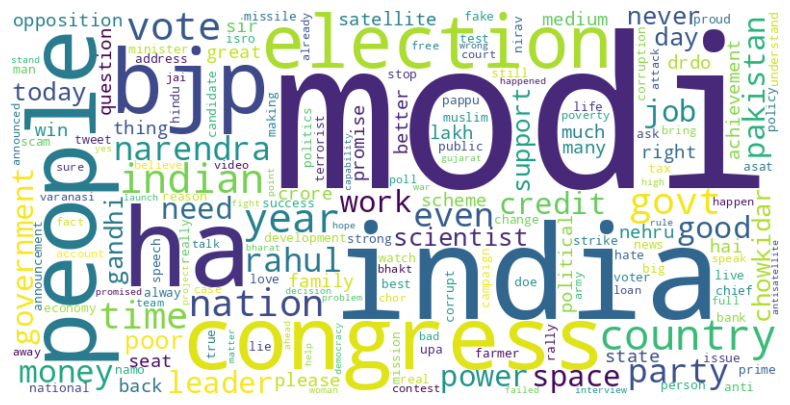

In [37]:
wc = WordCloud(width=800, height=400, background_color="white", min_font_size=10).generate(" ".join(bow.feature_names))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show

Now, looking at the least popular words.


In [38]:
bow.feature_names[freq_order[-50:]]

array(['poori', 'pollster', 'politics about', 'political capital',
       'election winning', 'modi actor', 'modi acronym', 'modi aisa',
       'modi airstrikes', 'concocted', 'conclusion modi', 'concluding',
       'concludes', 'yes thing', 'year talking', 'year talk',
       'year voter', 'about hate', 'small hiccup',
       'morality truthfulness', 'yet ha', 'abinandan',
       'abhinandan released', 'zor', 'able speak', 'able provide',
       'abhi bhi', 'youth power', 'hai tou', 'zafar', 'able vote',
       'politics indian', 'politics hate', 'misstep', 'orop modi',
       'modi leaving', 'drdo anti', 'drank', 'modi khud', 'paap', 'knife',
       'bharat campaign', 'bhakts please', 'forehead', 'kindly vaddi',
       'force credit', 'force chief', 'footstep modi', 'sleep night',
       'slogan blame'], dtype=object)

We still see that the themes mentioned in the most frequent terms are still present in this subset. Although, more filler or non-distinct words do appear more often, like "photos", "soft" and "types".

But the present of words like "reelection" and "wars" still point to this subset still being relevant to the main theme of the dataset.


# **4. Exploratory Data Analysis**

This section discusses the exploratory data analysis conducted on the dataset after cleaning.

> Notes from Zhean: <br>
> From manual checking via OpenRefine, there are a total of 162972. `df.info()` should have the same result post-processing.
> Furthermore, there should be two columns, `clean_text` (which is a bit of a misnormer since it is still dirty) contains the Tweets (text data). The second column is the `category` which contains the sentiment of the Tweet and is a tribool (1 positive, 0 neutral or indeterminate, and -1 for negative).


Now that we have our clean, lemmatized tweets, we can now work with a new DataFrame containing only **`lemmatized`** and the **`category`** columns.


In [39]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(["clean_text", "clean_ours"], axis=1)

df_cleaned = df_cleaned[["lemmatized", "category"]]  # for column reordering

df_cleaned

,lemmatized,category
0,modi promised minimum government maximum governance expected difficult job reforming state doe year justice state business exit psus temple,-1
1,talk all nonsense continue all drama vote modi,0
2,just vote modi welcome bjp told rahul main campaigner modi modi just relax,1
3,asking supporter prefix chowkidar modi great service confusion read crustal clear crass filthy nonsensical abuse coming chowkidars,1
4,answer powerful leader today trump putin modi,1
...,...,...
162975,crore paid neerav modi recovered congress leader hard earned money tax payer,-1
162976,dear rss terrorist payal gawar about modi killing plus muslim listen dysfunctional little pest pea size brain bleat commits crime criminal irrespective hindumuslim stop criminal religious twist,-1
162977,cover interaction forum left,0
162978,big project india modi dream project happened reality,0


Because we will be splitting this dataset later, we need to know if the distribution of the categories is balanced. An imbalanced distribution may cause a bias to the majority class. Understanding the distribution will inform us whether stratified splitting is necessary so that we do not have an under or overrepresented class.

We'll be using a bar graph as that is the simplest way for us to see the differences between the categorical data.


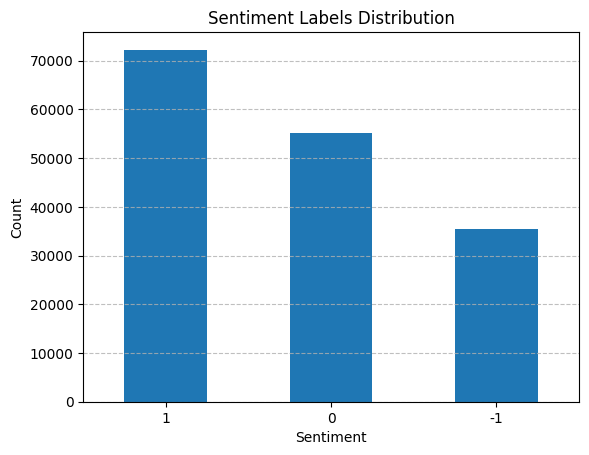

In [40]:
count = df_cleaned["category"].value_counts()

plt.title("Sentiment Labels Distribution")

count.plot(kind="bar")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)

plt.ylabel("Count")

plt.grid(axis="y", linestyle="--", alpha=0.8)  # horizontal lines

plt.show()

We can see that there is a noticeable difference between the three classes. The positive class (1) has a count of over 70,000, the neutral class (0) has around 55,000, and the negative class (-1) has around 30,000.

This imbalance indicates that we must use stratified splitting in the later section.


# **5 Dataset Splitting**

Before being able to use the dataset, we need to partition it into three sets:

1. **Training** - used to train the model to learn and change its parameters
2. **Validation** - used to evaluate the model, comparing its predictions to correct answers for hyperparameter tuning
3. **Test** - used to test the model with new, unseen data

The following section will be dedicated solely to splitting the dataset. We will split the dataset with 70% for training, 15% for validation, and 15% for testing as this is a standard partitioning.

## **Splitting the dataset into Training, Validation, and Testing sets**

We'll first split the dataset into 70% and 30% parts by using Scikit-learn's `train_test_split` function. As mentioned earlier, the distribution of categories is imbalanced, so we have to use the function's `stratify` parameter to maintain an even proportion.


In [41]:
train, temp = train_test_split(
    df_cleaned, test_size=0.3, stratify=df_cleaned["category"], random_state=5
)  # 70/30 split

print(train.shape, temp.shape)

(114059, 2) (48883, 2)


We now have our two sets for training and testing, but we're still missing one more for validation. We can split the 30% part into two halves of 15% so that we have a part for validation and the other part for testing.


In [42]:
validation, test = train_test_split(
    temp, test_size=0.5, stratify=temp["category"], random_state=5
)  # 15/15 split

print(train.shape, validation.shape, test.shape)

(114059, 2) (24441, 2) (24442, 2)


Now that we have our training, validation, and testing sets, we can use these on the models.


# **References**

Bird, S., & Loper, E. (2004, July). NLTK: The natural language toolkit. _Proceedings of the ACL Interactive Poster and Demonstration Sessions_, 214–217. https://aclanthology.org/P04-3031/

El-Demerdash, A. A., Hussein, S. E., & Zaki, J. F. W. (2021). Course evaluation based on deep learning and SSA hyperparameters optimization. _Computers, Materials & Continua, 71_(1), 941–959. https://doi.org/10.32604/cmc.2022.021839

George, M., & Murugesan, R. (2024). Improving sentiment analysis of financial news headlines using hybrid Word2Vec-TFIDF feature extraction technique. _Procedia Computer Science, 244_, 1–8.

Hussein, S. (2021). _Twitter sentiments dataset_. Mendeley.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. _Journal of Machine Learning Research, 12_, 2825–2830.

Rani, D., Kumar, R., & Chauhan, N. (2022, October). Study and comparison of vectorization techniques used in text classification. In _2022 13th International Conference on Computing Communication and Networking Technologies (ICCCNT)_ (pp. 1–6). IEEE.

Wolfram Research. (2015). _DeleteStopwords_. https://reference.wolfram.com/language/ref/DeleteStopwords.html


# **Appendix: `clean` wrapper function definition**

Below is the definition of the `clean` wrapper function that encapsulates all internal functions used in the cleaning pipeline.


In [43]:
clean??

Signature: clean(text: str) -> str
Source:   
def clean(text: str) -> str:
    """
    This is the main function for data cleaning (i.e., it calls all the cleaning functions in the prescribed order).

    This function should be used as a first-class function in a map.

    # Parameters
    * text: The string entry from a DataFrame column.
    * stopwords: stopword dictionary.

    # Returns
    Clean string
    """
    # cleaning on the base string
    text = normalize(text)
    text = rem_punctuation(text)
    text = rem_numbers(text)
    text = collapse_whitespace(text)

    return text
File:      ~/STINTSY-Order-of-Erin/lib/janitor.py
Type:      function

# **Appendix: `find_spam_and_empty` wrapper function definition**

Below is the definition of the `find_spam_and_empty` wrapper function that encapsulates all internal functions for the spam detection algorithm.


In [44]:
find_spam_and_empty??

Signature: find_spam_and_empty(text: str, min_length: int = 3) -> str | None
Source:   
def find_spam_and_empty(text: str, min_length: int = 3) -> str | None:
    """
    Filter out empty text and unintelligible/spammy unintelligible substrings in the text.

    Spammy substrings:
    - Shorter than min_length
    - Containing non-alphabetic characters
    - Consisting of a repeated substring (e.g., 'aaaaaa', 'ababab', 'abcabcabc')

    # Parameters
    * text: input string.
    * min_length: minimum length of word to keep.

    # Returns
        Cleaned string, or None if empty after filtering.
    """
    cleaned_tokens = []
    for t in text.split():
        if len(t) < min_length:
            continue

        if re.search(r"(.)\1{2,}", t):
            continue

        min_diversity = 0.3 + (0.1 * min(len(t), 10) / 10)
        if len(set(t)) / len(t) < min_diversity:
            continue

        if re.match(r"^(.+)\1+", t):
            continue

        cleaned_tokens.append(t)



# **Appendix: comparison of traditional vectorization techniques**

Traditional vectorization techniques include BoW and Term Frequency-Inverse Document Frequency (TF-IDF). TF-IDF weights each word based on its frequency in a document and its rarity across the corpus, reducing the impact of common words. BoW, in contrast, simply counts word occurrences without considering corpus-level frequency. In this project, BoW was chosen because stopwords were already removed during preprocessing, and the dataset is domain-specific <u>(Rani et al., 2022)</u>. In such datasets, frequent words are often meaningful domain keywords, so scaling them down (as TF-IDF would) could reduce the importance of these key terms in the feature representation.


# **Appendix: `BagOfWordsModel` class definition**

Below is the definition of the `BagOfWordsModel` class that encapsulates the desired parameters.


In [45]:
BagOfWordsModel??

Init signature:
BagOfWordsModel(
    texts: Iterable[str],
    min_freq: int | float | None = None,
    max_freq: int | float | None = None,
)
Source:        
class BagOfWordsModel:
    """
    A Bag-of-Words representation for a text corpus.

    # Attributes
    * matrix (scipy.sparse.csr_matrix): The document-term matrix of word counts.
    * feature_names (list[str]): List of feature names corresponding to the matrix columns.
    *
    # Usage
    ```
    bow = BagOfWordsModel(df["lemmatized_str"])
    ```
    """

    def __init__(
        self,
        texts: Iterable[str],
        min_freq: int | float | None = None,
        max_freq: int | float | None = None,
    ):
        """
        Initialize the BagOfWordsModel by fitting the vectorizer to the text corpus. This also filters out tokens
        that do not appear more than five times in the dataset.

        This sets its tokenizer to the word boundary tokenizer since the input, at this point, **should** be
        cleaned 